<h1 align="center">Rossmann Store Sales Analysis</h1>

# Introduction
The primary objective of this project is to forecast sales across all stores, spanning various cities, up to six weeks in advance. This enables the finance team to make informed decisions and optimize their strategies.

The challenge is to build an end-to-end product that delivers accurate sales predictions to the finance team. To achieve this, I have identified several factors that significantly influence sales, such as promotions, competition, school and state holidays, seasonality, and locality.

In this exploratory data analysis (EDA), I will delve into the Rossmann Store Sales dataset, which contains a wealth of information about store sales, customer behavior, and external factors. The goal is to gain insights into the data, understand its patterns, and identify any potential issues that may arise during the modeling process.

Data and Features:

Datasets:

- train.csv - historical data including Sales
- test.csv - historical data excluding Sales
- sample_submission.csv - a sample submission file in the correct format
- store.csv - supplemental information about the stores

The dataset comprises various fields, each providing valuable insights into sales patterns. Key features include:

- Id: A unique identifier for each (Store, Date) pair in the test set.
- Store: A unique ID for each store.
- Sales: The turnover for any given day, which is the target variable we aim to predict.
- Customers: The number of customers on a given day.
- Open: An indicator for whether the store was open: 0 = closed, 1 = open.
- StateHoliday: Indicates a state holiday, with 'a' representing public holidays, 'b' representing Easter holidays, 'c' representing Christmas, and '0' representing no holiday.
- SchoolHoliday: Indicates if the (Store, Date) was affected by the closure of public schools.
- StoreType: Differentiates between four different store models: a, b, c, and d.
- Assortment: Describes an assortment level: a = basic, b = extra, c = extended.
- CompetitionDistance: The distance in meters to the nearest competitor store.
- CompetitionOpenSince[Month/Year]: The approximate year and month of the time the nearest competitor was opened.
- Promo: Indicates whether a store is running a promo on that day.
- Promo2: A continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
- Promo2Since[Year/Week]: Describes the year and calendar week when the store started participating in Promo2.
- PromoInterval: Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.
Throughout this EDA, I will explore the relationships between these features and sales, identify any missing or inconsistent data, and prepare the dataset for modeling.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os, sys

In [2]:
# Get the absolute path to the parent directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path
sys.path.append(parent_dir)

from src import handler, visualizer

# Data Gathering

In [3]:
%load_ext kedro.ipython

[06/01/24 09:51:42] INFO     Registered line magic '%reload_kedro'                                   ]8;id=531789;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=808048;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=661811;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=52839;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=515806;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=509586;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py#171\171]8;;\
                             /home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/rossmann-stor                
                             e-analysis.                                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/01 09:51:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[06/01/24 09:52:02] INFO     Kedro project Rossmann_store_analysis                                  ]8;id=690011;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=583354;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=50745;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=514211;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[06/01/24 09:52:08] INFO     Registered line magic 'run_viz'                                        ]8;id=369428;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=351328;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [4]:
train_df = catalog.load("train")
test_df = catalog.load("test")
store_df = catalog.load("store")

[06/01/24 09:52:25] INFO     Loading data from train (CSVDataset)...                            ]8;id=467411;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=271940;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/io/data_catalog.py#508\508]8;;\

[06/01/24 09:52:28] WARNING  /home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/pyt ]8;id=769324;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=974643;file:///usr/lib/python3.11/warnings.py#109\109]8;;\
                             hon3.11/site-packages/kedro_datasets/pandas/csv_dataset.py:166:                       
                             DtypeWarning: Columns (7) have mixed types. Specify dtype option on                   
                             import or set low_memory=False.                                                       
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

                    INFO     Loading data from test (CSVDataset)...                             ]8;id=711456;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=993573;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/io/data_catalog.py#508\508]8;;\

                    INFO     Loading data from store (CSVDataset)...                            ]8;id=950759;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=949048;file:///home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/python3.11/site-packages/kedro/io/data_catalog.py#508\508]8;;\

In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


# Merge the dataset

In [5]:
train_df = pd.merge(train_df, store_df, how="inner", on="Store")
test_df = pd.merge(test_df, store_df, how="inner", on="Store")

In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Data Overview

In [6]:
# create handler object
handler_df1 = handler.Handler(train_df)
handler_df2 = handler.Handler(test_df)

In [9]:
# Data overview of train_df
handler_df1.data_overview()

Number of rows: 1017209
Number of columns: 18

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  Comp

In [10]:
# Data overview of test_df
handler_df2.data_overview()

Number of rows: 41088
Number of columns: 17

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-n

# Data Cleaning
- Handling missing values
- Handling duplicate values
- Handling outliers 

## 1. Handling Missing Values
Handling missing values is another important step in data cleaning. Missing values can be represented as NaN (Not a Number) or empty strings. I use the `isnull()` function to identify missing values and the `dropna()` function to remove rows with missing values.

In [7]:
# check missing values train_df
handler_df1.calculate_missing_percentage()

                           Missing Values Percentage Missing
Store                                   0              0.00%
DayOfWeek                               0              0.00%
Date                                    0              0.00%
Sales                                   0              0.00%
Customers                               0              0.00%
Open                                    0              0.00%
Promo                                   0              0.00%
StateHoliday                            0              0.00%
SchoolHoliday                           0              0.00%
StoreType                               0              0.00%
Assortment                              0              0.00%
CompetitionDistance                  2642              0.26%
CompetitionOpenSinceMonth          323348             31.79%
CompetitionOpenSinceYear           323348             31.79%
Promo2                                  0              0.00%
Promo2SinceWeek         

In [8]:
# check missing values test_df
handler_df2.calculate_missing_percentage()

                           Missing Values Percentage Missing
Id                                      0              0.00%
Store                                   0              0.00%
DayOfWeek                               0              0.00%
Date                                    0              0.00%
Open                                   11              0.03%
Promo                                   0              0.00%
StateHoliday                            0              0.00%
SchoolHoliday                           0              0.00%
StoreType                               0              0.00%
Assortment                              0              0.00%
CompetitionDistance                    96              0.23%
CompetitionOpenSinceMonth           15216             37.03%
CompetitionOpenSinceYear            15216             37.03%
Promo2                                  0              0.00%
Promo2SinceWeek                     17232             41.94%
Promo2SinceYear         

In [7]:
def fill_missing_value(df, col):
    try:
        if df[col].dtype == "object":
            df[col] = df[col].fillna(df[col].mode()[0])
            return df
        df[col] = df[col].fillna(df[col].median())
        return df
    except Exception as e:
        print(f"ERROR {e}")

In [8]:
# Fill missing value
# column with missing value
cols = ["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]
for col in cols:
    train_df = fill_missing_value(train_df, col)
    test_df = fill_missing_value(test_df, col)

In [11]:
handler_df1.calculate_missing_percentage()

                           Missing Values Percentage Missing
Store                                   0              0.00%
DayOfWeek                               0              0.00%
Date                                    0              0.00%
Sales                                   0              0.00%
Customers                               0              0.00%
Open                                    0              0.00%
Promo                                   0              0.00%
StateHoliday                            0              0.00%
SchoolHoliday                           0              0.00%
StoreType                               0              0.00%
Assortment                              0              0.00%
CompetitionDistance                     0              0.00%
CompetitionOpenSinceMonth               0              0.00%
CompetitionOpenSinceYear                0              0.00%
Promo2                                  0              0.00%
Promo2SinceWeek         

## 2. Handling Duplicate Values
Handling duplicate values involves identifying and removing duplicate rows from the DataFrame. I use the `duplicated()` function to identify duplicate rows and the `drop_duplicates()` function to remove them.

In [16]:
#check duplicate values for train_df
handler_df1.check_duplicate()


Duplicated values:
0 duplicated rows


In [17]:
#check duplicate values for test_df
handler_df2.check_duplicate()


Duplicated values:
0 duplicated rows


## 3. Handling outliers
Handling outliers is a crucial step in data cleaning and preprocessing. Here are the key steps to handle outliers effectively:
#### Identifying Outliers
The first step is to identify the presence of outliers in my dataset. I Use box plots.

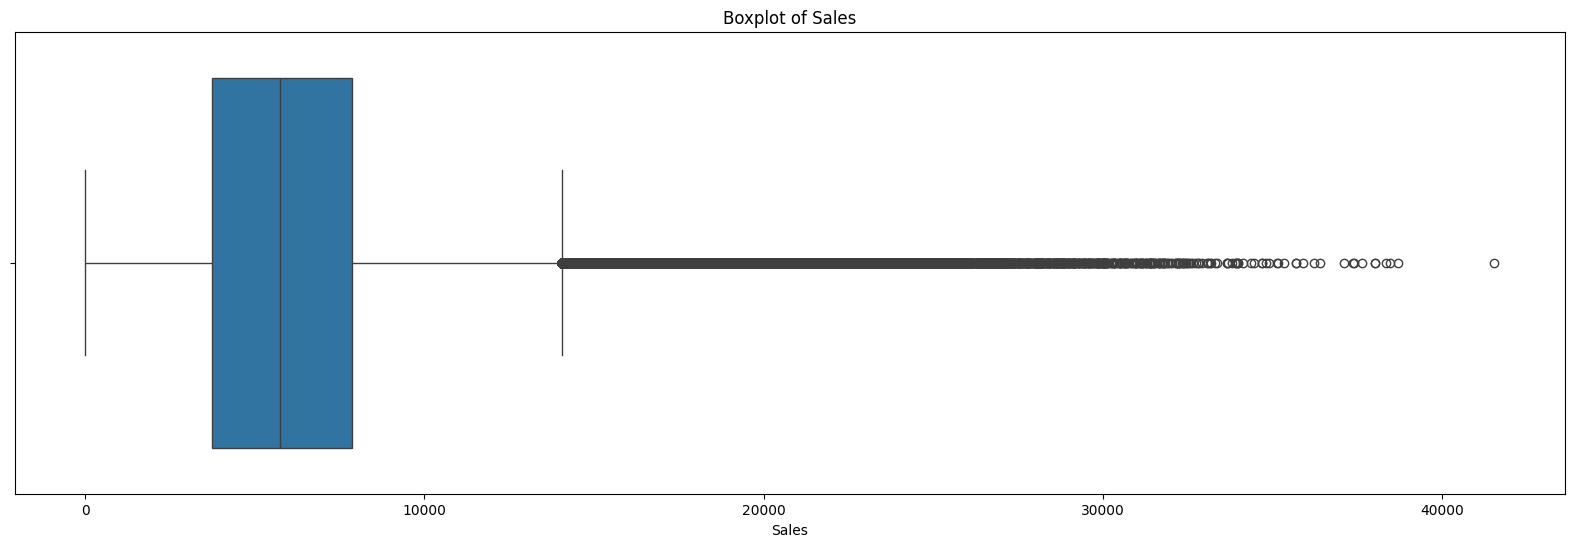

In [18]:
visualizer.plot_boxplot(train_df, "Sales")

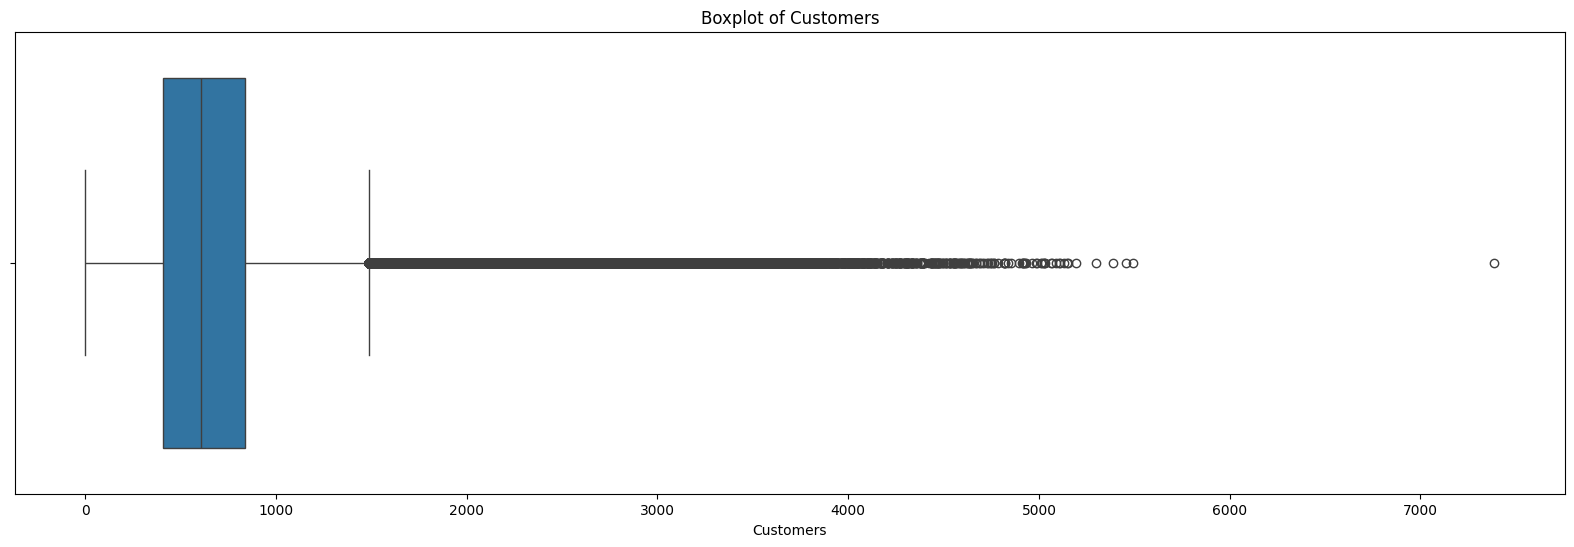

In [19]:
visualizer.plot_boxplot(train_df, "Customers")

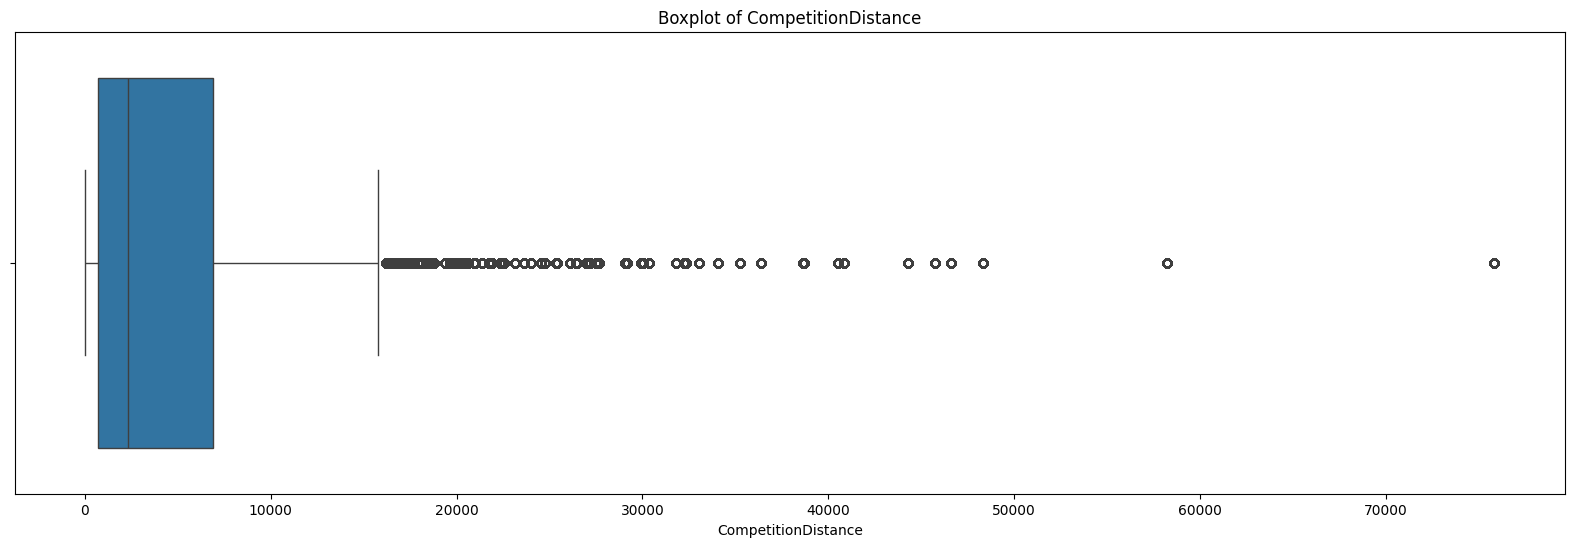

In [20]:
visualizer.plot_boxplot(train_df, "CompetitionDistance")

The whisker of the above box plots shows that there is an outlier in the columns.

#### Removing the outliers

In [9]:
train_df=handler_df1.remove_iqr_outliers("Sales")

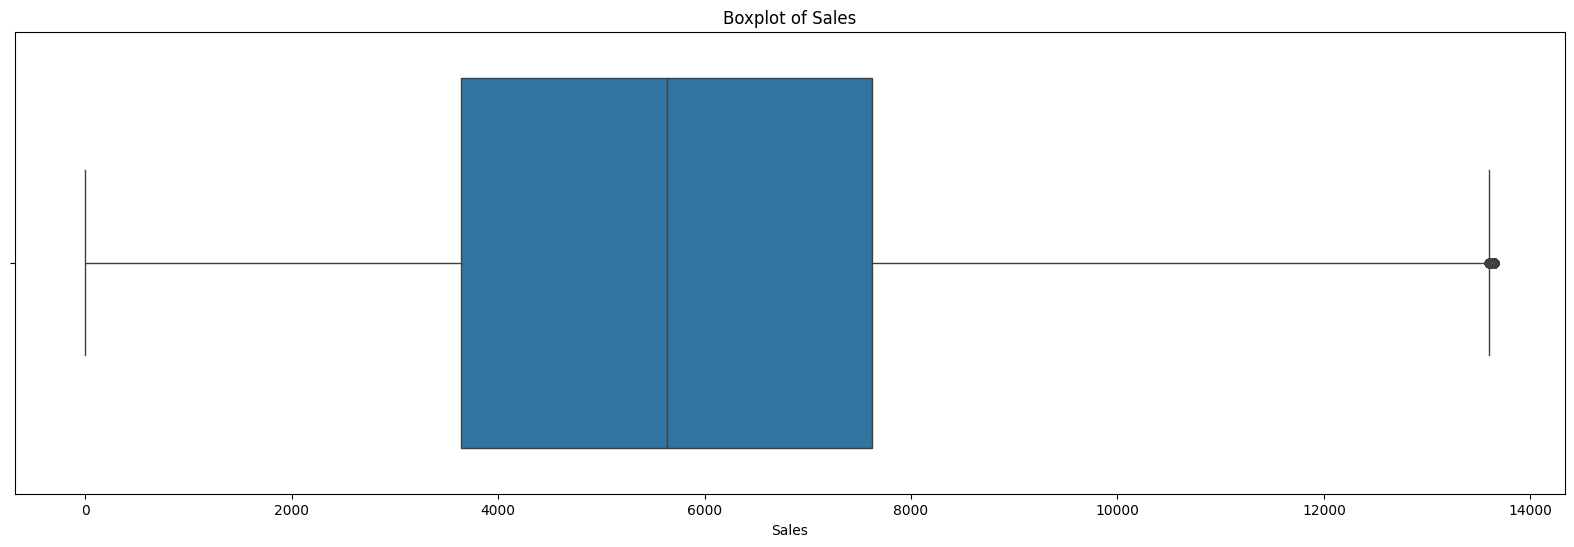

In [23]:
visualizer.plot_boxplot(train_df, "Sales")

In [10]:
train_df = handler_df1.remove_iqr_outliers("Customers")

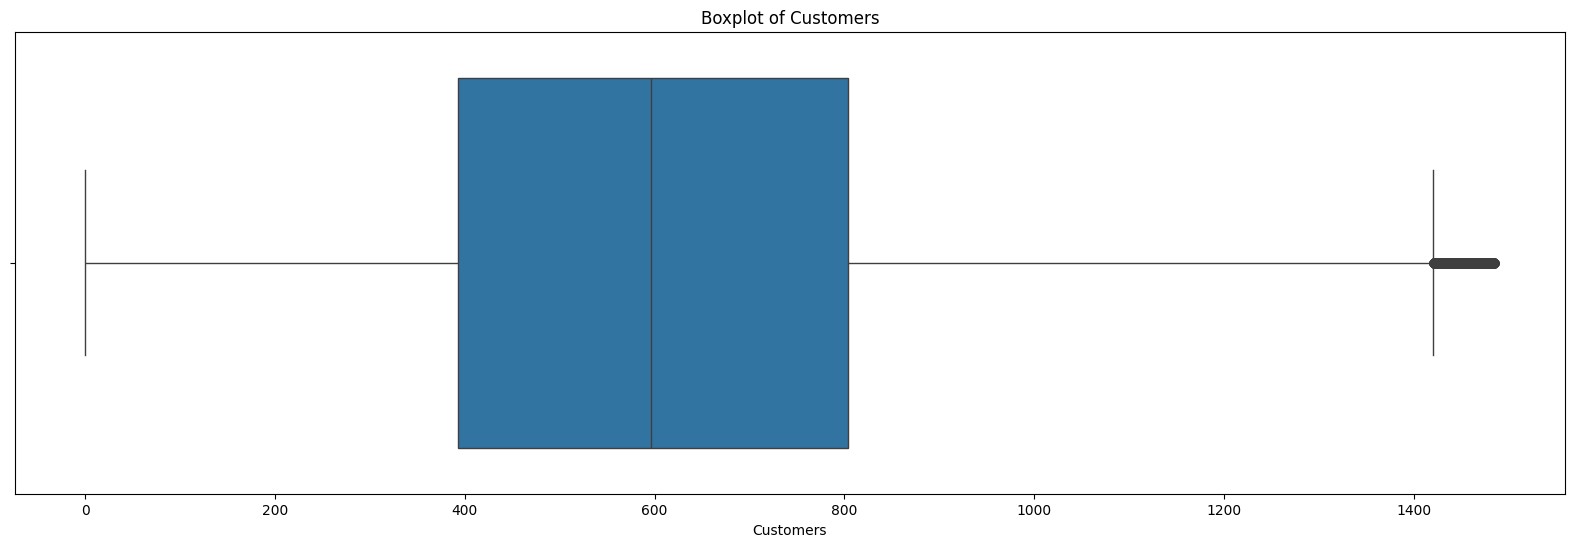

In [25]:
visualizer.plot_boxplot(train_df, "Customers")

In [11]:
train_df = handler_df1.remove_iqr_outliers("CompetitionDistance")

# Feature selection and Feature Engineering

In [12]:
train_df = handler_df1.create_date_features()
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Season
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,c,...,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",31,31,7,2015,Summer
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,31,7,2015,Summer
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,31,7,2015,Summer
3,4,5,2015-07-31,13995.0,NaN,1,1,0,1,c,...,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",31,31,7,2015,Summer
4,5,5,2015-07-31,4822.0,559.0,1,1,0,1,a,...,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",31,31,7,2015,Summer


# Storing the Data

In [17]:
train_df.to_csv("../data/02_intermediate/train_clean.csv")

# Descriptive Statistics

In [13]:
num_col, cat_col = train_df.select_dtypes(exclude=['object']), train_df.select_dtypes(include=["object"])

In [19]:
# stats for numric type
num_col.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Week,Month,Year
count,1.017209e+06,1.017209e+06,1017209,990515.000000,979114.000000,1.017209e+06,1.017209e+06,1.017209e+06,918049.000000,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5465.548842,577.156766,8.301067e-01,3.815145e-01,1.786467e-01,3406.535414,7.469899e+00,2.009107e+03,5.005638e-01,2.263526e+01,2.011876e+03,1.570279e+01,23.615515,5.846762e+00,2.013832e+03
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,20.000000,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,1.0,1.000000e+00,2.013000e+03
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3650.000000,393.000000,1.000000e+00,0.000000e+00,0.000000e+00,600.000000,6.000000e+00,2.008000e+03,0.000000e+00,2.200000e+01,2.012000e+03,8.000000e+00,11.0,3.000000e+00,2.013000e+03
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5651.000000,596.000000,1.000000e+00,0.000000e+00,0.000000e+00,2020.000000,8.000000e+00,2.010000e+03,1.000000e+00,2.200000e+01,2.012000e+03,1.600000e+01,22.0,6.000000e+00,2.014000e+03
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7651.000000,804.000000,1.000000e+00,1.000000e+00,0.000000e+00,4700.000000,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,2.300000e+01,35.0,8.000000e+00,2.014000e+03
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,14049.000000,1485.000000,1.000000e+00,1.000000e+00,1.000000e+00,15770.000000,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,3.100000e+01,52.0,1.200000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,NaN,3368.179566,355.015226,3.755392e-01,4.857586e-01,3.830564e-01,3756.127932,2.677243e+00,4.986802e+00,4.999999e-01,9.993137e+00,1.182965e+00,8.787638e+00,14.433381,3.326097e+00,7.773960e-01


In [14]:
#stats for Categorical column
cat_col.describe()

,StateHoliday,StoreType,Assortment,PromoInterval,Season
count,1017209,1017209,1017209,1017209,1017209
unique,5,4,3,3,4
top,0,a,a,"Jan,Apr,Jul,Oct",Spring
freq,855087,551627,537445,801153,307740


# Data Visualisation
Data visualization is a crucial aspect of data analysis, as it helps to effectively communicate insights and patterns in the data. Here's a brief overview of how data visualization can be applied in univariate, bivariate, and multivariate analysis.

## Univariate analysis
In univariate analysis, where only one variable is considered at a time. These visualizations help to understand the central tendency, spread, and shape of the distribution of a single variable.


Q1. What is the distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [22]:
# pie Plot
def plot_pie(df, col):
        counts = df[col].value_counts()

        # Create an explode sequence of zeros with the same length as promo_counts
        explode = [0]*len(counts)

        # Plot the pie chart
        plt.pie(counts, 
                labels=counts.index, 
                startangle=90, 
                counterclock=False, 
                autopct='%1.2f%%', 
                explode=explode, 
                shadow=True)
        plt.title(f'{col} Count Comparison', fontsize=15)
        plt.axis('equal')
        plt.show()

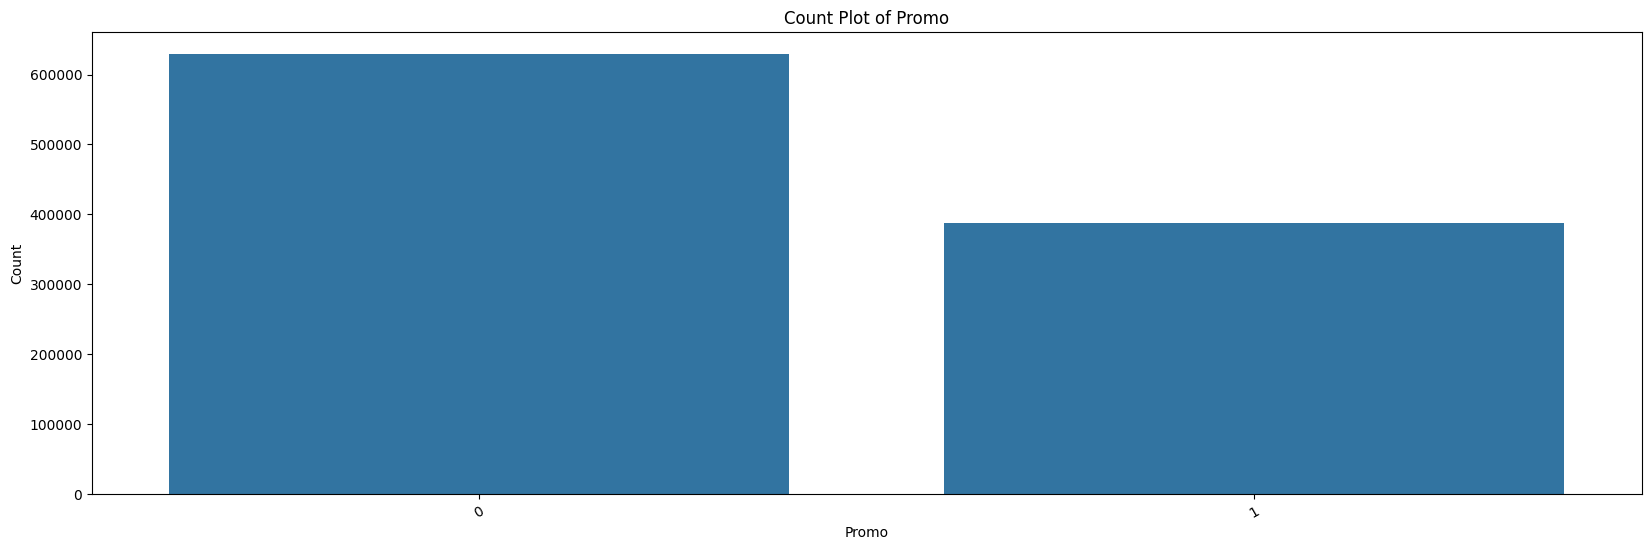

In [19]:
visualizer.plot_count(train_df, 'Promo')

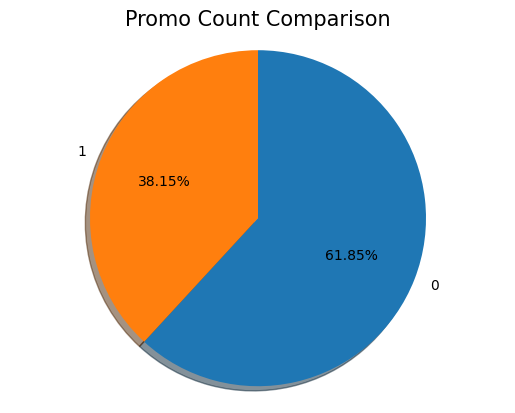

In [23]:
plot_pie(train_df, "Promo")

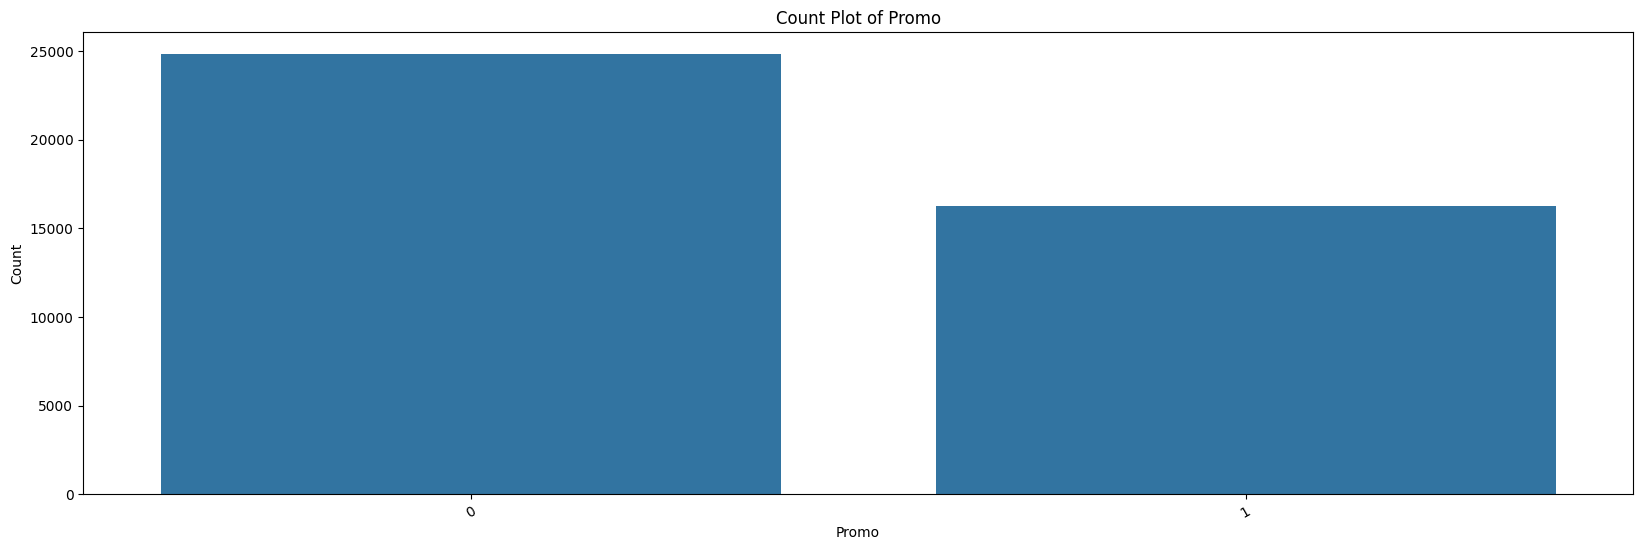

In [20]:
visualizer.plot_count(test_df, 'Promo')

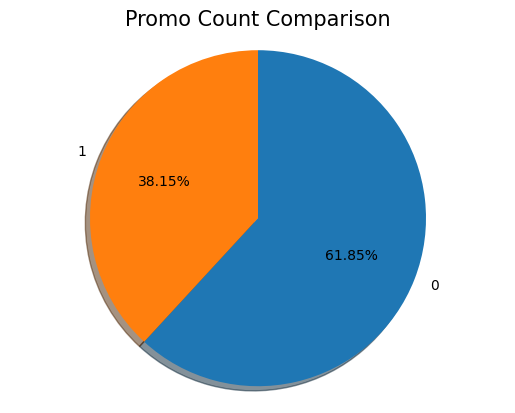

In [24]:
plot_pie(train_df, "Promo")

Based on the plots, the `Promo` data distributions seems the same on both datasets.Based on the pie plot 61.85% of the stors are not participated in any promotions, and 38.15% of the stors are partcipated in Promotions.

## Bivariate analysis and Multivariate analysis

Multivariate analysis involves the study of three or more variables simultaneously. Visualizations for multivariate data can be more complex.

Bivariate analysis examines the relationship between two variables.


Q2. Check & compare sales behavior before, during, and after holidays:

In [13]:
# Step 1: Identify Holidays
train_df['Holiday'] = train_df['StateHoliday'].apply(lambda x: 'Holiday' if x != '0' else '')
train_df['Holiday'] = train_df.apply(lambda x: 'Holiday' if x['SchoolHoliday'] == 1 else x['Holiday'], axis=1)

# Step 2: Create Holiday Periods
def holiday_period(row):
    if row['Holiday'] == 'Holiday':
        if row['DayOfWeek'] <= 5:  # Before Holiday
            return 'Before Holiday'
        elif row['DayOfWeek'] == 6:  # During Holiday
            return 'During Holiday'
        else:  # After Holiday
            return 'After Holiday'
    else:
        return 'No Holiday'

train_df['HolidayPeriod'] = train_df.apply(holiday_period, axis=1)

# Step 3: Compare Sales
holiday_sales = train_df.groupby(['Store', 'HolidayPeriod'])['Sales'].mean().reset_index()


In [13]:
# bar plot
def plot_bar(df, col1, col2, hue=None, xtricks=None):
    plt.figure(figsize=(20, 10))
    if hue == None:
        sns.barplot(data=df, x=col1, y=col2)
    else:
        sns.barplot(data=df, x=col1, y=col2, hue=hue)
    plt.xlabel(col1, fontsize=15)
    plt.ylabel(col2, fontsize=15)
    plt.title(f"Comparision between {col1} and {col2}", fontsize=15)
    if xtricks != None:
        plt.xticks(df[col1].unique(), xtricks, rotation=90)
    plt.xticks(rotation=90)
    plt.show()

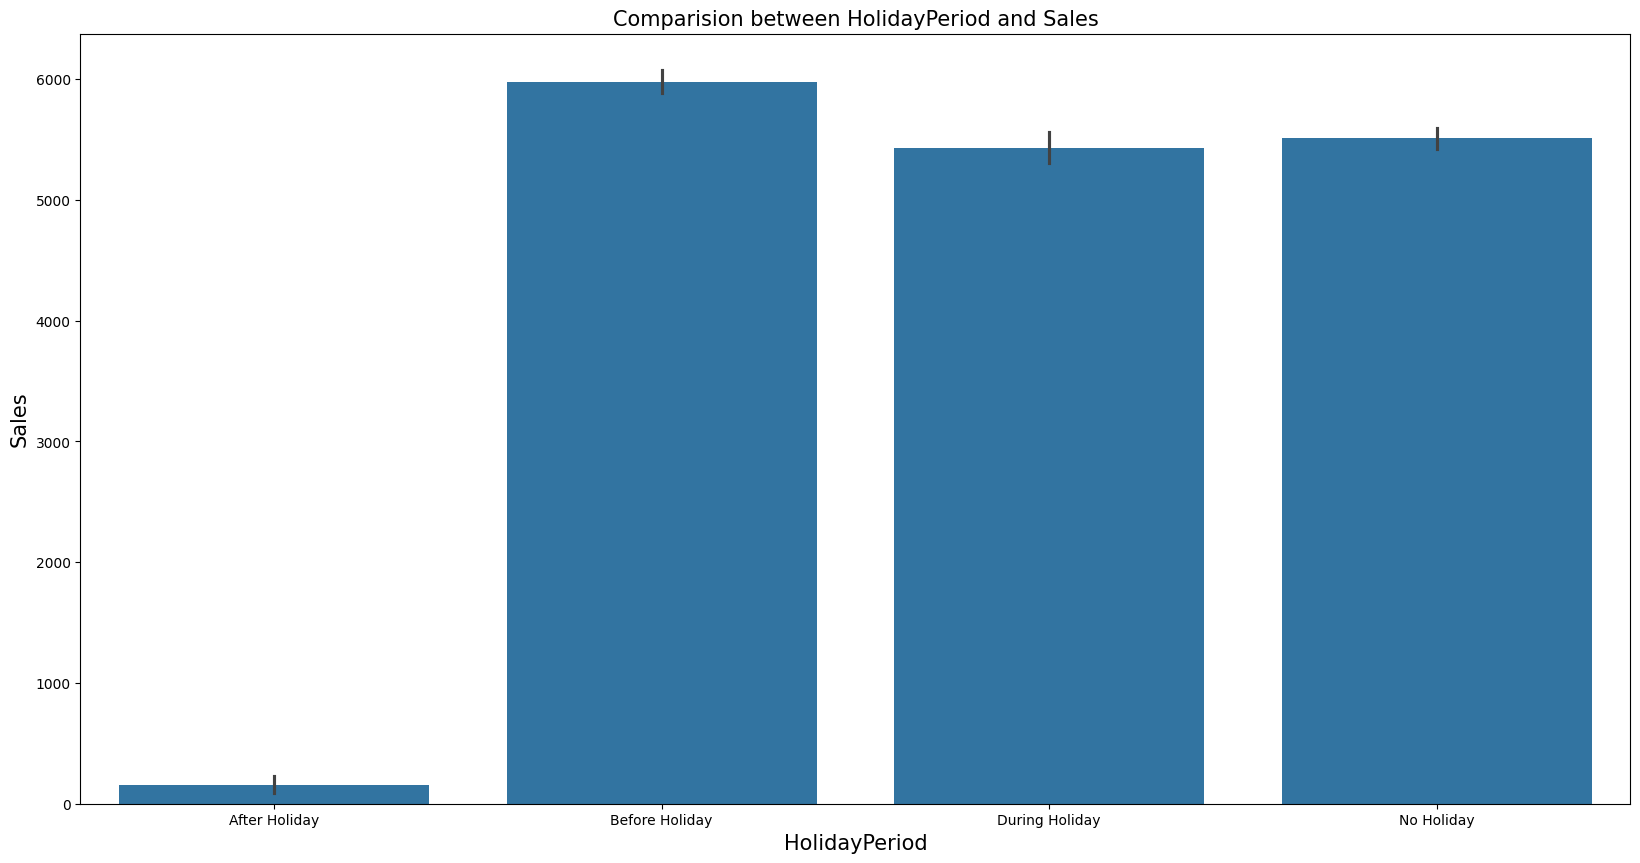

In [23]:

plot_bar(holiday_sales, "HolidayPeriod", "Sales")

The plot shows, After Holiday the sale is decline, Before Holiday, During Holiday and No Holiday the sales remain consistant.

Q3:Find out any seasonal (Christmas, Easter, etc) purchase behaviors,


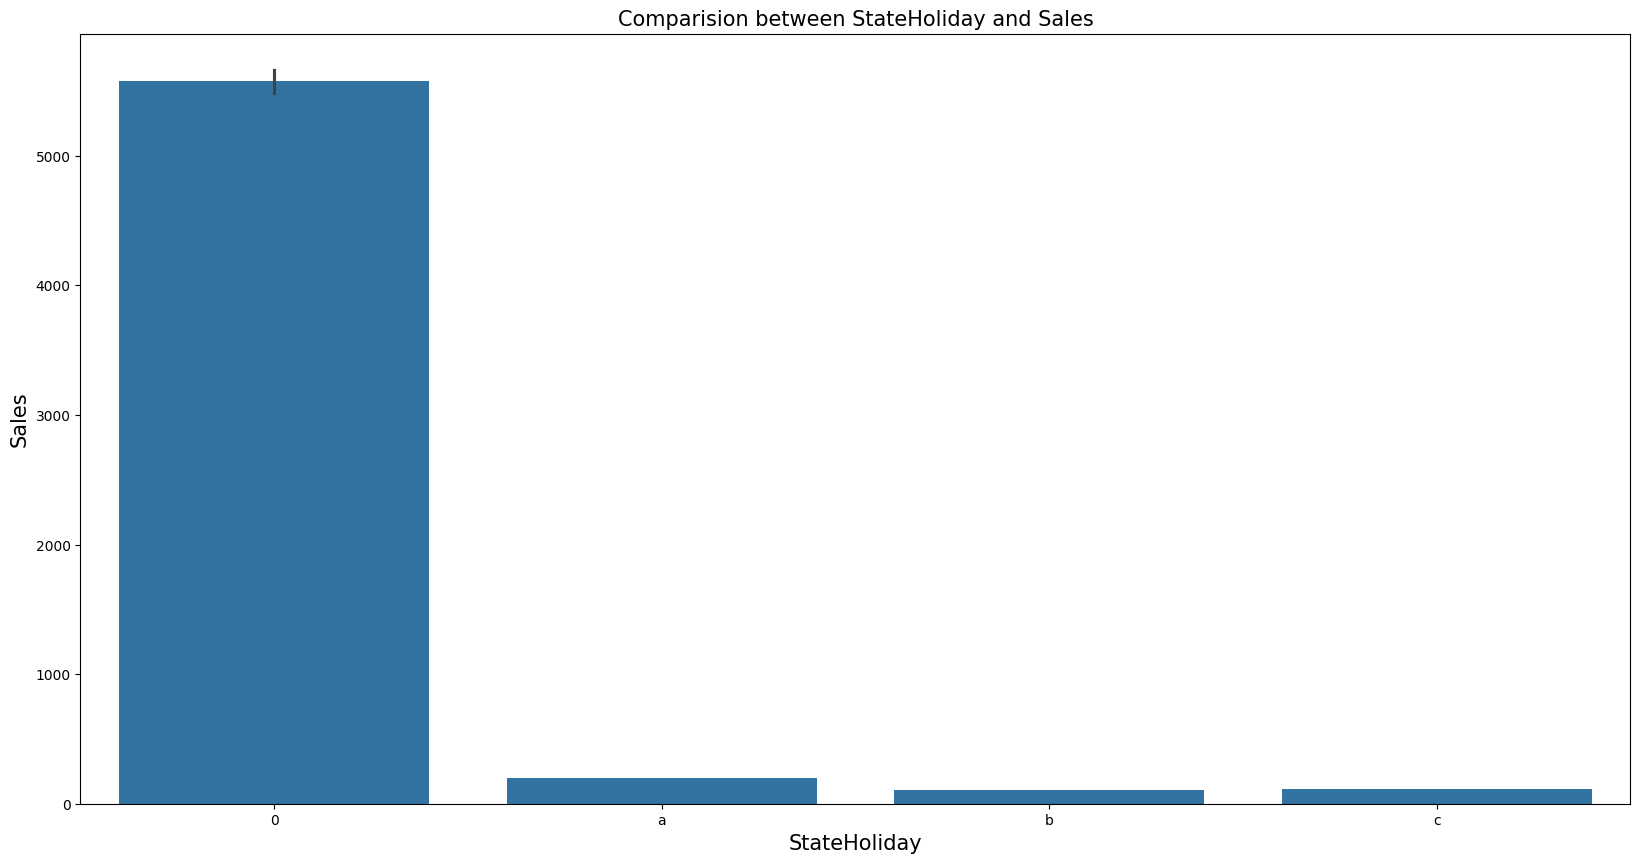

In [33]:
seasonal = train_df.groupby('StateHoliday')['Sales'].mean().reset_index()
plot_bar(seasonal, 'StateHoliday', 'Sales')

In the above plot, `a` representing public holidays, `b` representing Easter holidays, `c` representing Christmas, and `0` representing no holiday. 

Based on the plot, the sale is much better when there is no holiday.

Q4: What can you say about the correlation between sales and the number of customers?

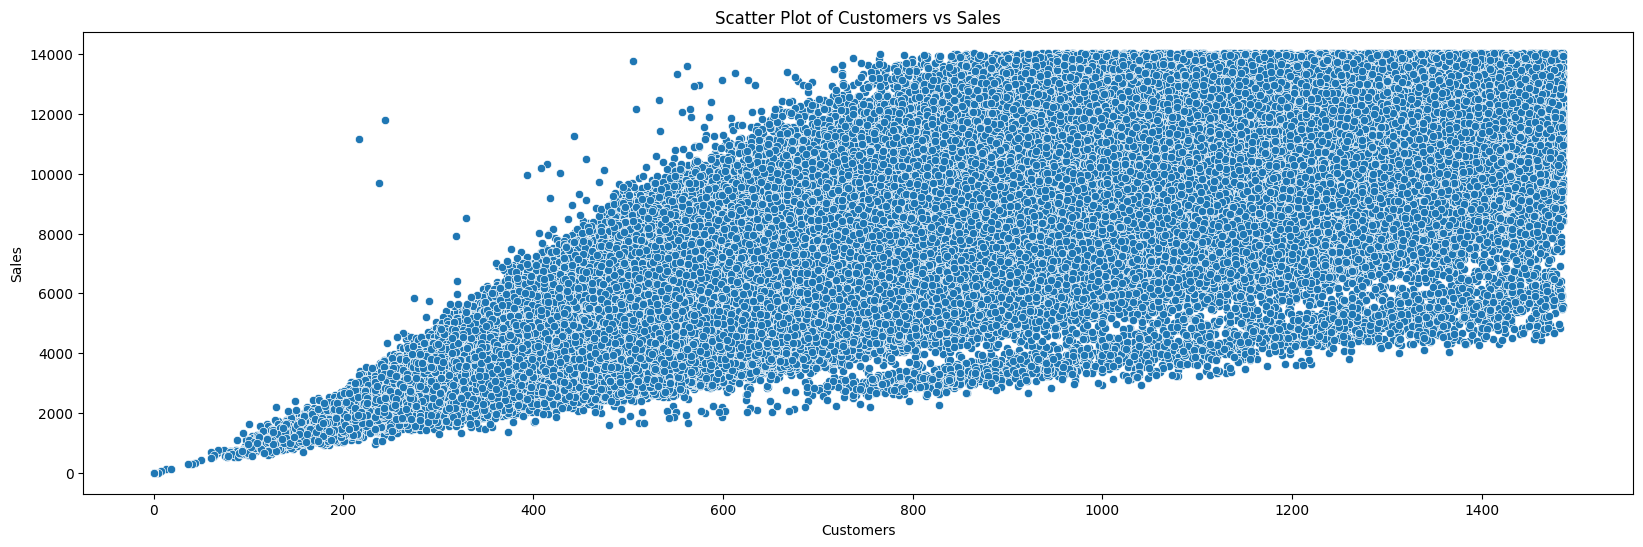

In [36]:
visualizer.plot_scatter(train_df, 'Customers', 'Sales')

The plot shows, There is a postive correlation between `Sales` and `Customers`.

Q5: How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

[06/01/24 09:37:33] WARNING  /home/derbew/Documents/10a/Rossmann_Store_Sales_Analysis/myenv/lib/pyt ]8;id=171800;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=95411;file:///usr/lib/python3.11/warnings.py#109\109]8;;\
                             hon3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning:                    
                             Creating legend with loc="best" can be slow with large amounts of                     
                             data.                                                                                 
                               fig.canvas.print_figure(bytes_io, **kw)                                             
                                                                                                                   

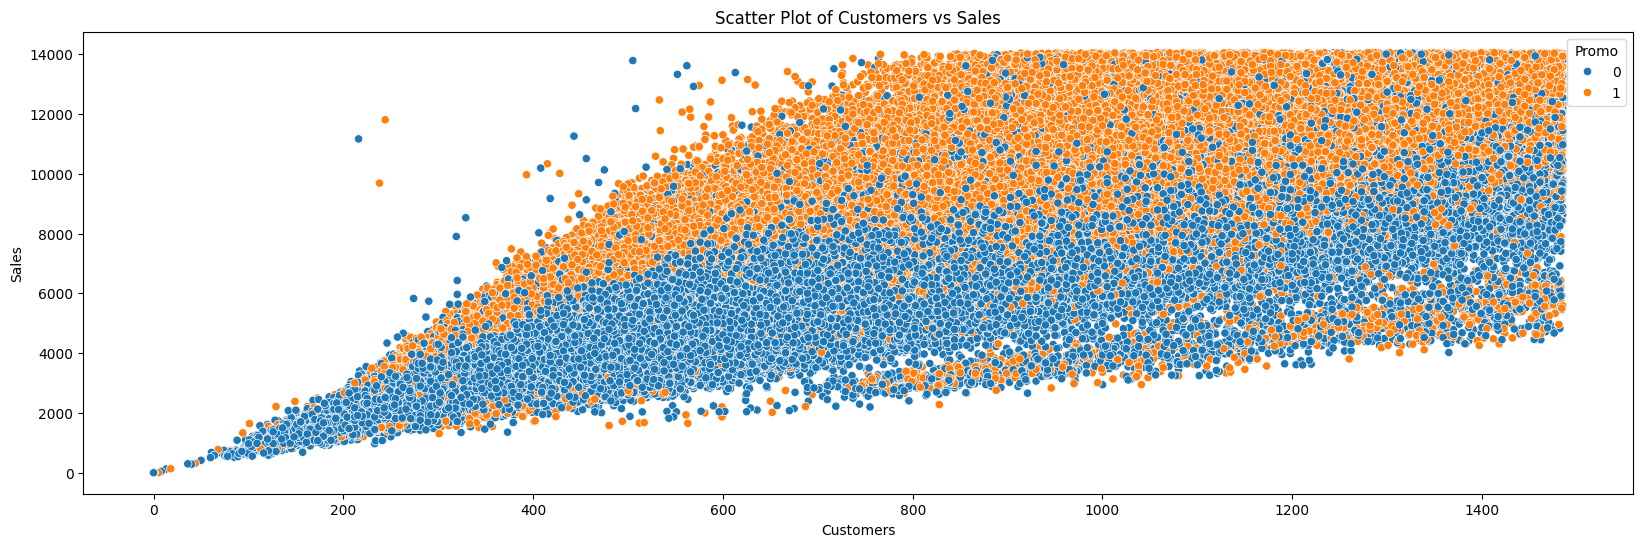

In [18]:
visualizer.plot_scatter(train_df, 'Customers', 'Sales', hue_col='Promo')

In [37]:
# Calculate Average Sales with and without Promo
avg_sales_with_promo = train_df[train_df['Promo'] == 1]['Sales'].mean()
avg_sales_without_promo = train_df[train_df['Promo'] == 0]['Sales'].mean()

# Calculate Average Customers with and without Promo
avg_customers_with_promo = train_df[train_df['Promo'] == 1]['Customers'].mean()
avg_customers_without_promo = train_df[train_df['Promo'] == 0]['Customers'].mean()

# Calculate the Difference
sales_diff = avg_sales_with_promo - avg_sales_without_promo
customers_diff = avg_customers_with_promo - avg_customers_without_promo

# Analyze the Results
print(f"Average sales with promo: {avg_sales_with_promo}")
print(f"Average sales without promo: {avg_sales_without_promo}")
print(f"Difference in average sales: {sales_diff}")
print(f"Average customers with promo: {avg_customers_with_promo}")
print(f"Average customers without promo: {avg_customers_without_promo}")
print(f"Difference in average customers: {customers_diff}")

Average sales with promo: 7512.835578338434
Average sales without promo: 4250.614772321443
Difference in average sales: 3262.2208060169914
Average customers with promo: 751.3627649031864
Average customers without promo: 472.5710939670813
Difference in average customers: 278.7916709361051


Q6: Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [20]:
# Analyze Sales and Customers by Store
store_sales = train_df.groupby(['StoreType', 'Promo'])['Sales'].mean().reset_index()
store_customers = train_df.groupby(['StoreType', 'Promo'])['Customers'].mean().reset_index()

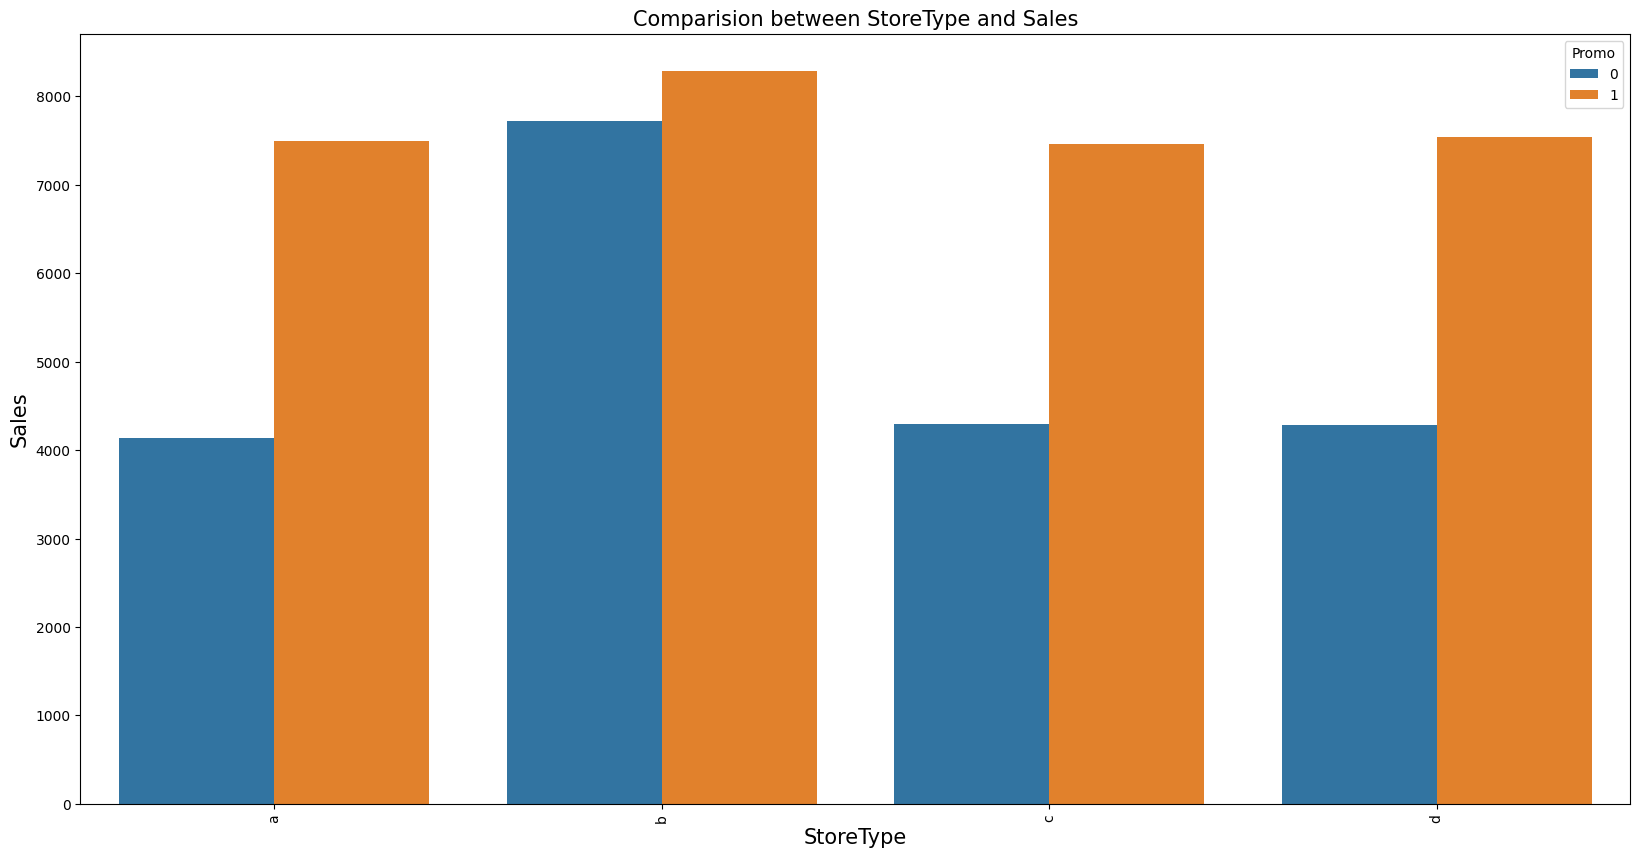

In [21]:
plot_bar(store_sales, 'StoreType', 'Sales', hue='Promo')

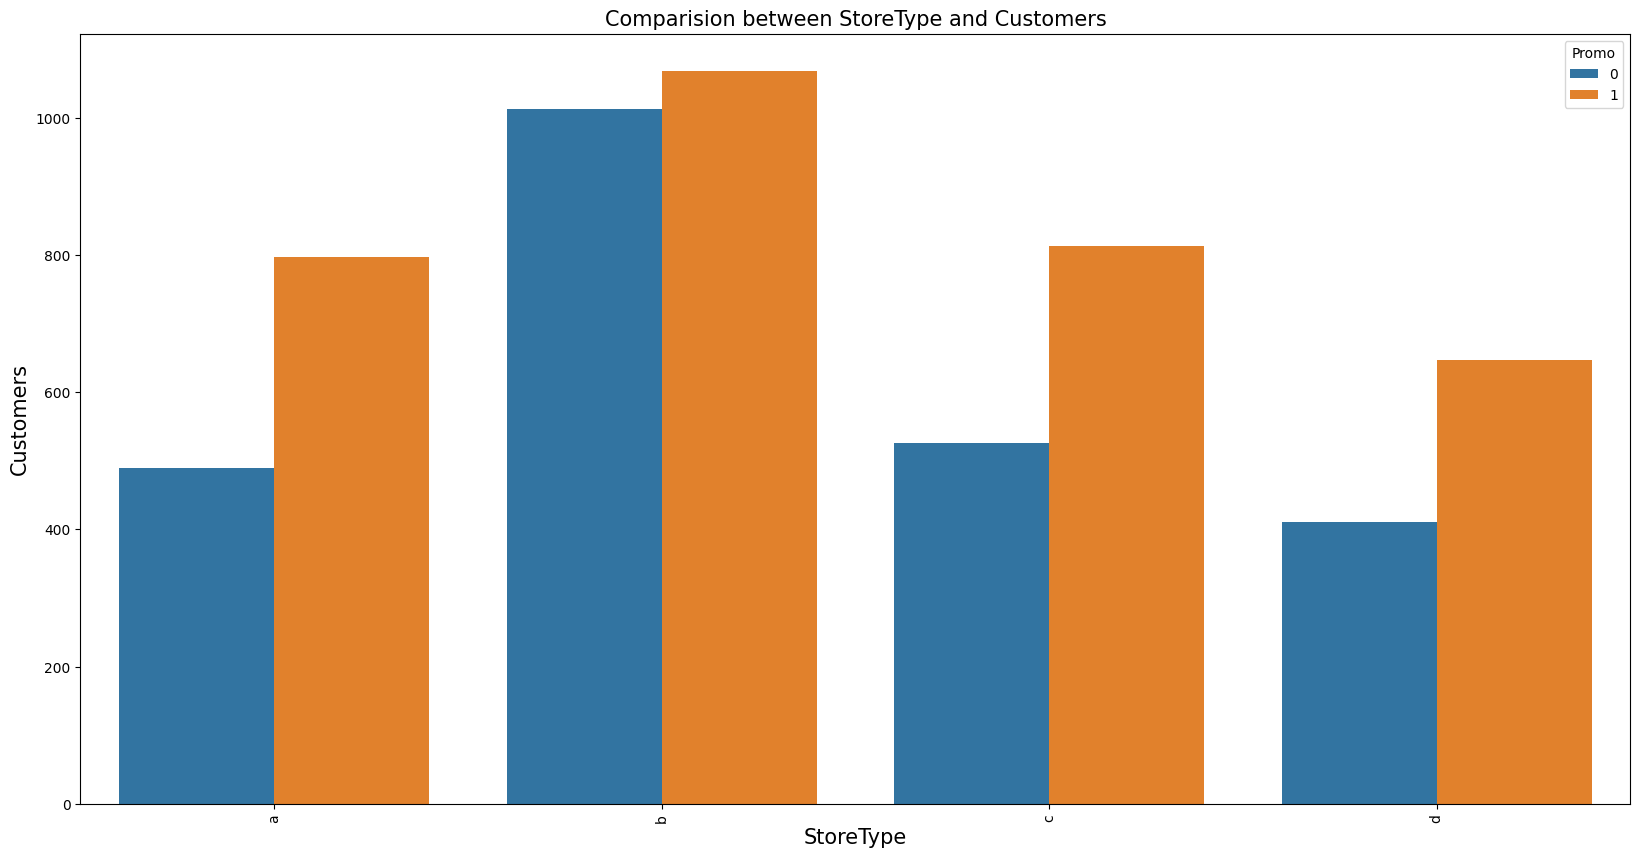

In [22]:
plot_bar(store_customers, 'StoreType', 'Customers', hue='Promo')

The above two plots show that stores with promotions had more sales and customers compared to stores with no promotions.

Q7: Trends of customer behavior during store opening and closing times

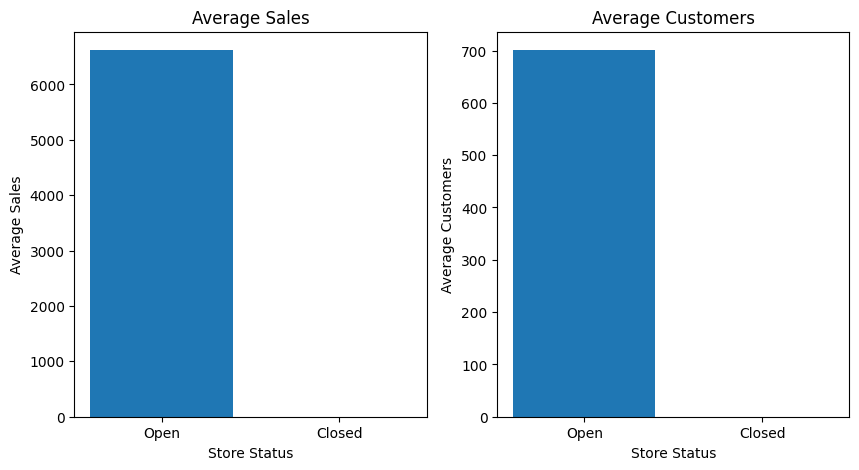

In [46]:
import matplotlib.pyplot as plt

# Filter the Data
open_stores = train_df[train_df['Open'] == 1]
closed_stores = train_df[train_df['Open'] == 0]

# Analyze Sales and Customers
avg_sales_open = open_stores['Sales'].mean()
avg_sales_closed = closed_stores['Sales'].mean()
avg_customers_open = open_stores['Customers'].mean()
avg_customers_closed = closed_stores['Customers'].mean()

# Calculate the Difference
sales_diff = avg_sales_open - avg_sales_closed
customers_diff = avg_customers_open - avg_customers_closed

# Visualize the Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['Open', 'Closed'], [avg_sales_open, avg_sales_closed])
plt.title('Average Sales')
plt.xlabel('Store Status')
plt.ylabel('Average Sales')
plt.subplot(1, 2, 2)
plt.bar(['Open', 'Closed'], [avg_customers_open, avg_customers_closed])
plt.title('Average Customers')
plt.xlabel('Store Status')
plt.ylabel('Average Customers')
plt.show()

Q8: Which stores are open on all weekdays? How does that affect their sales on weekends?

In [19]:
# Filter the Data
open_stores = train_df[train_df['Open'] == 1]

# Group the Data
open_stores = open_stores.groupby(['DayOfWeek'])['Sales'].mean().reset_index()

# Analyze Sales on Weekends
weekend_sales_all_weekdays = open_stores[open_stores['DayOfWeek'].isin(list(range(1, 6)))]['Sales'].mean()
weekend_sales_all_stores = open_stores[open_stores['DayOfWeek'].isin([6, 7])]['Sales'].mean()

print(f"Average sales on weekends for stores open on all weekdays: {weekend_sales_all_weekdays}")
print(f"Average sales on weekends for all stores: {weekend_sales_all_stores}")


Average sales on weekends for stores open on all weekdays: 6829.925385347497
Average sales on weekends for all stores: 5950.292734346731


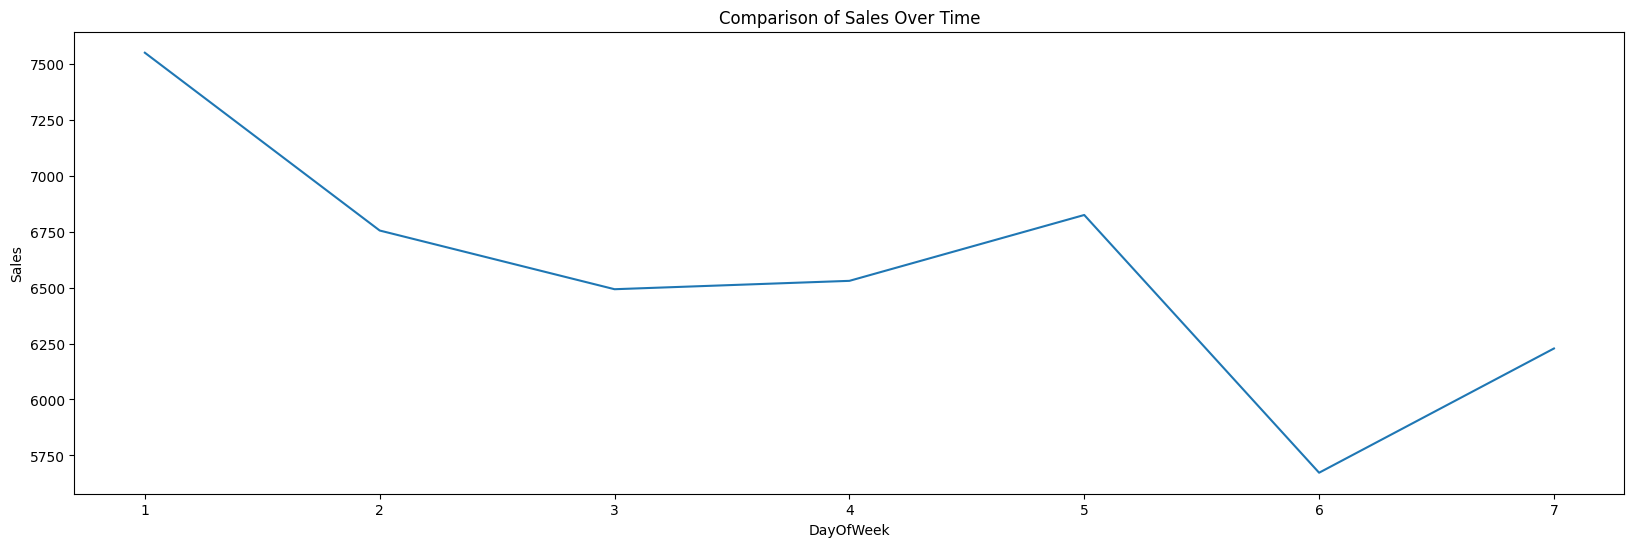

In [20]:
visualizer.plot_line(open_stores, 'DayOfWeek', 'Sales')

The line plot shows, On Monday the sales are higher, but they decrease on Tuesday. From Tuesday to Thursday, sales seem consistent. Sales increase again on Friday. However, on Saturday, sales are too low, and they increase once more on Sunday. In general, during the weekdays, sales are higher, whereas during the weekends, sales are smaller.

Q9: Check how the assortment type affects sales

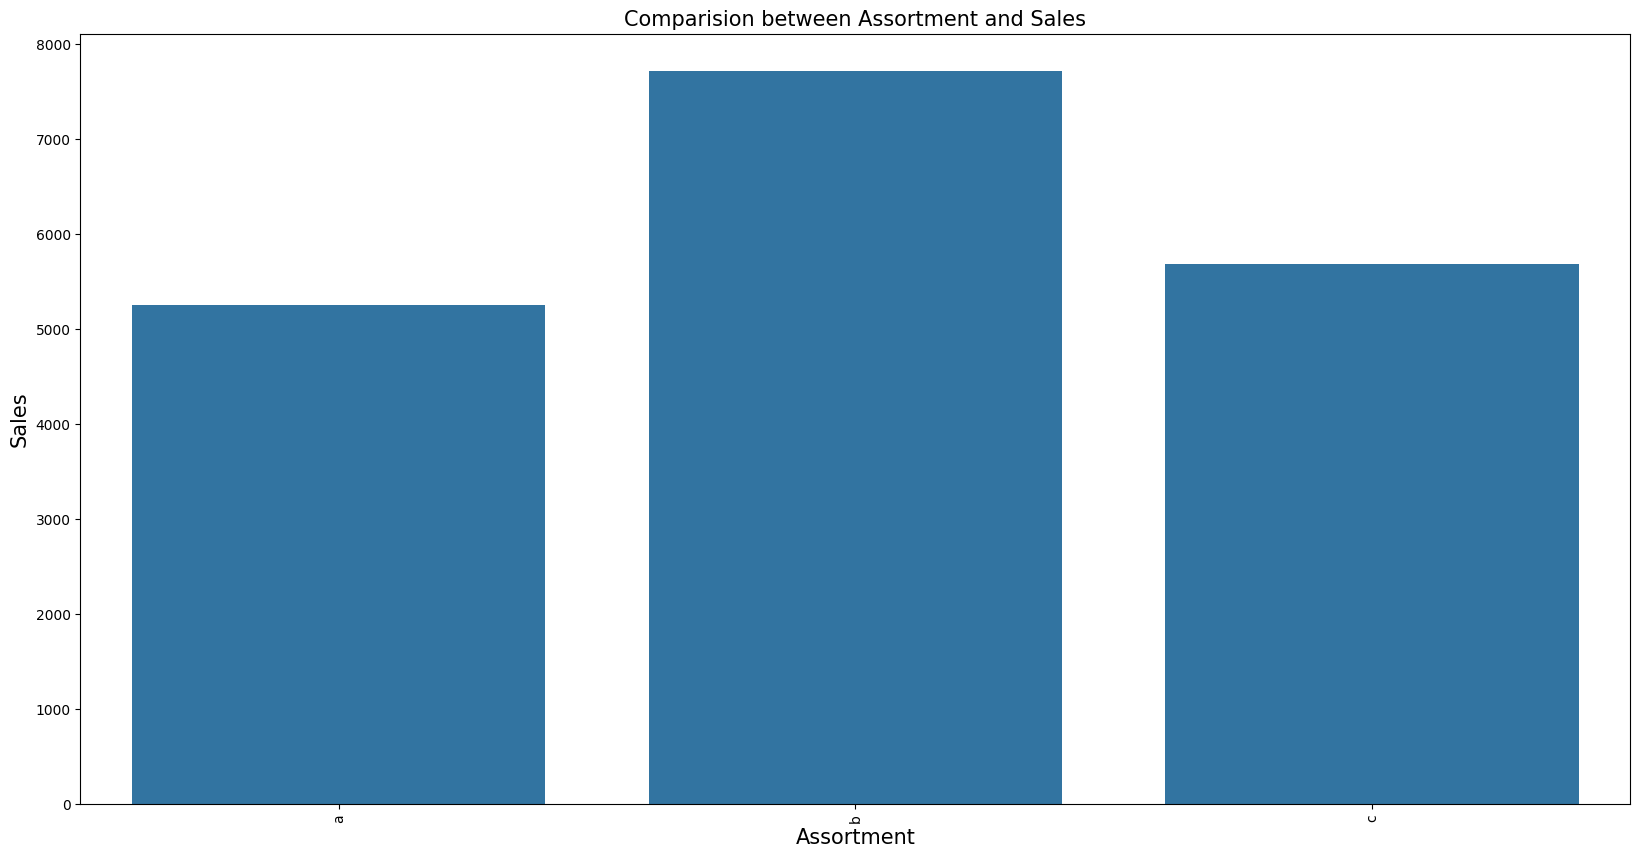

In [14]:
assort = train_df.groupby('Assortment')['Sales'].mean().reset_index()
plot_bar(assort, 'Assortment', 'Sales')

Based on the bar plot, the `b` assortment initially leads with over 7000 sales, followed by the `c` assortment with 6000 sales, and then the `a` assortment with 5000 sales.

Q10: How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

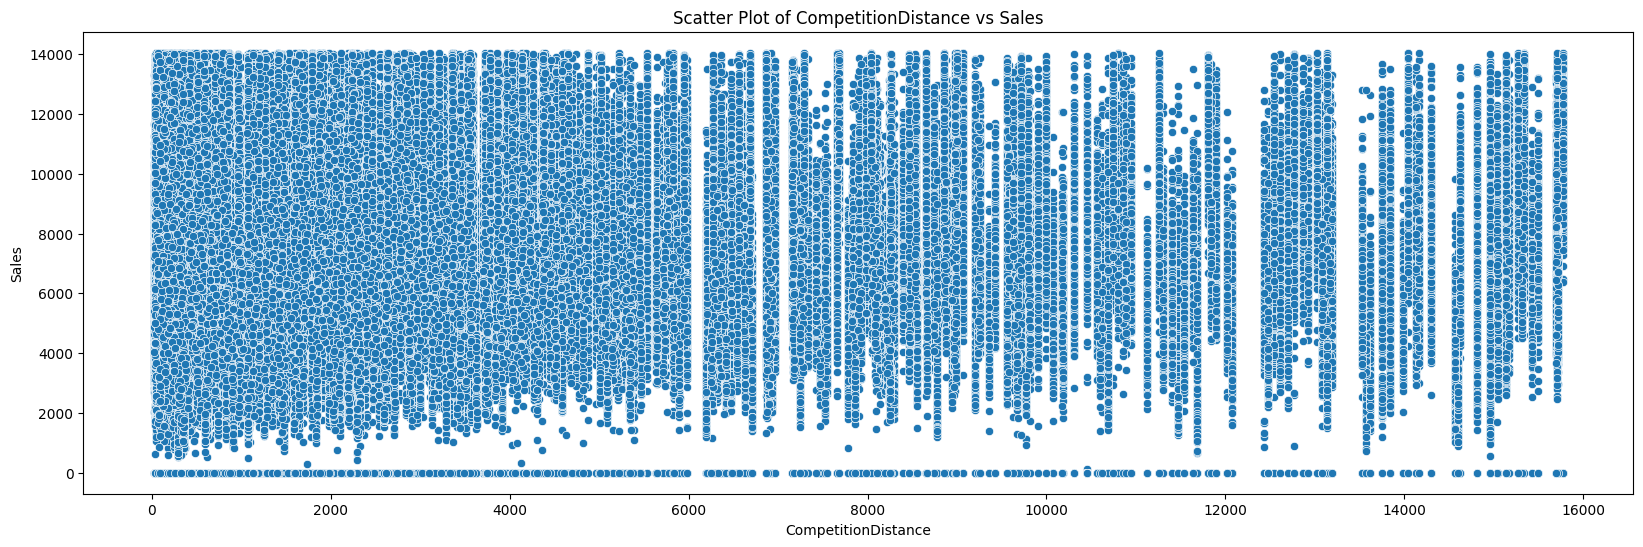

In [16]:
visualizer.plot_scatter(train_df, 'CompetitionDistance', 'Sales')

Based on the above plot, thers doesn't seem to be a clear relationship between competition distance and sales. Sales figures are scattered throughout the range of competition distances without a noticeable trend or pattern.

There are several vertical clusters where data points are densely packed at certain competition distances. This could indicate specfic competitive environments or regional characteristics affecting multiple stores similarly.

Q11: How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

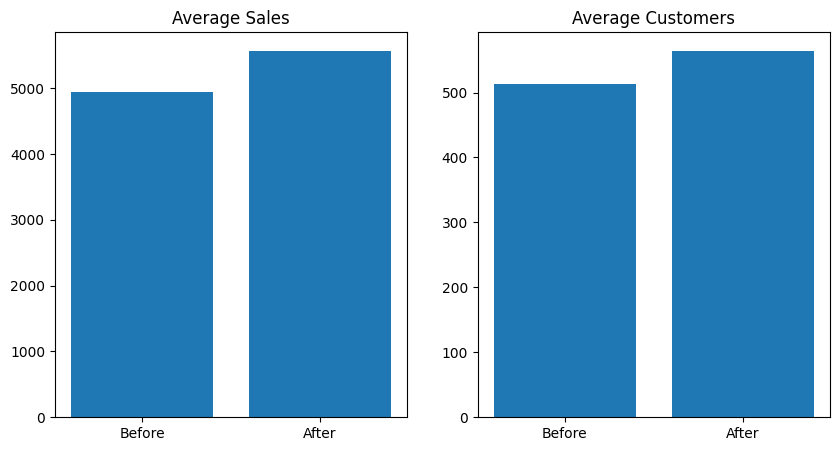

In [27]:
# Create a new column that contains the date when new competitors opened near each store
#train_df['CompetitionOpenSinceDate'] = pd.to_datetime(train_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].assign(DAY=1), errors='coerce')

# Function to create CompetitionOpenSinceDate safely
def create_competition_open_date(row):
    if pd.notna(row['CompetitionOpenSinceMonth']) and pd.notna(row['CompetitionOpenSinceYear']):
        return pd.to_datetime(f"{int(row['CompetitionOpenSinceYear'])}-{int(row['CompetitionOpenSinceMonth'])}-01")
    else:
        return pd.NaT

# Apply the function to create the new column
train_df['CompetitionOpenSinceDate'] = train_df.apply(create_competition_open_date, axis=1)

# Filter the Data
new_competitors = train_df[(train_df['CompetitionDistance'].isna()) & (train_df['CompetitionOpenSinceMonth'].notna())]

# Analyze Sales and Customers
before_sales = new_competitors[new_competitors['Date'] < new_competitors['CompetitionOpenSinceDate']]['Sales'].mean()
after_sales = new_competitors[new_competitors['Date'] >= new_competitors['CompetitionOpenSinceDate']]['Sales'].mean()
before_customers = new_competitors[new_competitors['Date'] < new_competitors['CompetitionOpenSinceDate']]['Customers'].mean()
after_customers = new_competitors[new_competitors['Date'] >= new_competitors['CompetitionOpenSinceDate']]['Customers'].mean()

# Calculate the Difference
sales_diff = after_sales - before_sales
customers_diff = after_customers - before_customers

# Visualize the Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['Before', 'After'], [before_sales, after_sales])
plt.title('Average Sales')
plt.subplot(1, 2, 2)
plt.bar(['Before', 'After'], [before_customers, after_customers])
plt.title('Average Customers')
plt.show()


Q12. Trends over different Times.

In [17]:
selected_features = ['Day',	'Week',	'Month', 'Year']

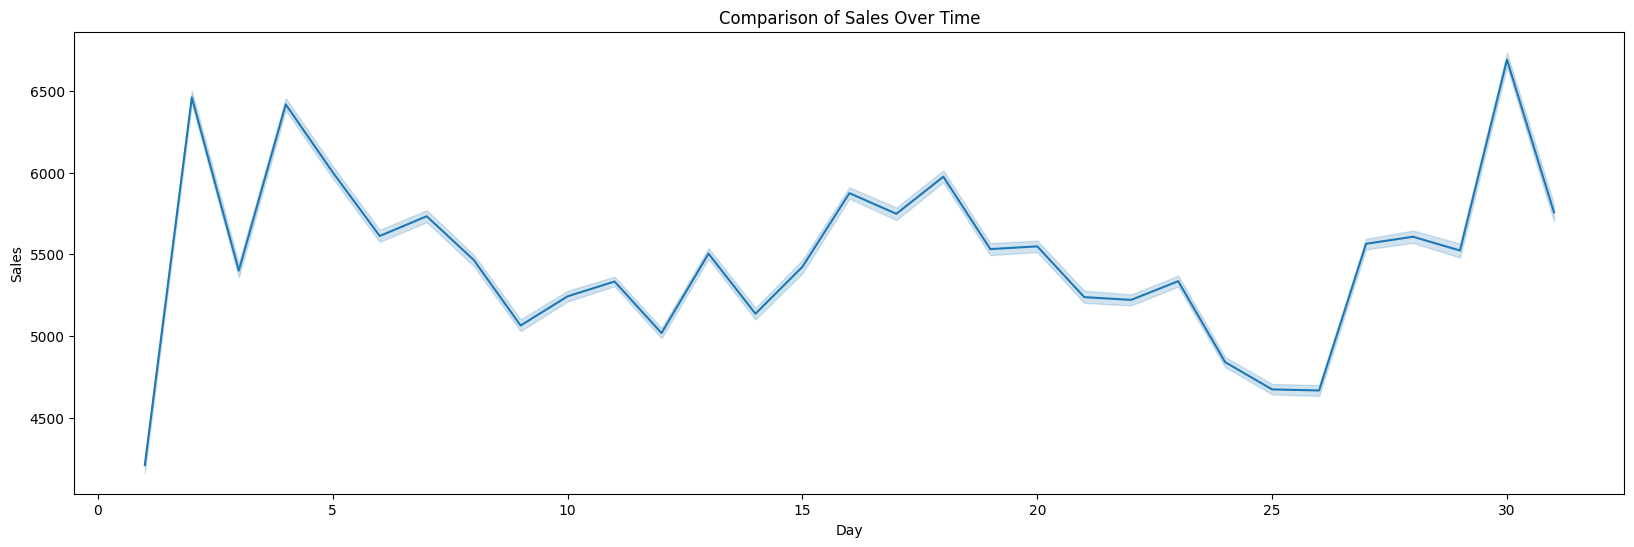

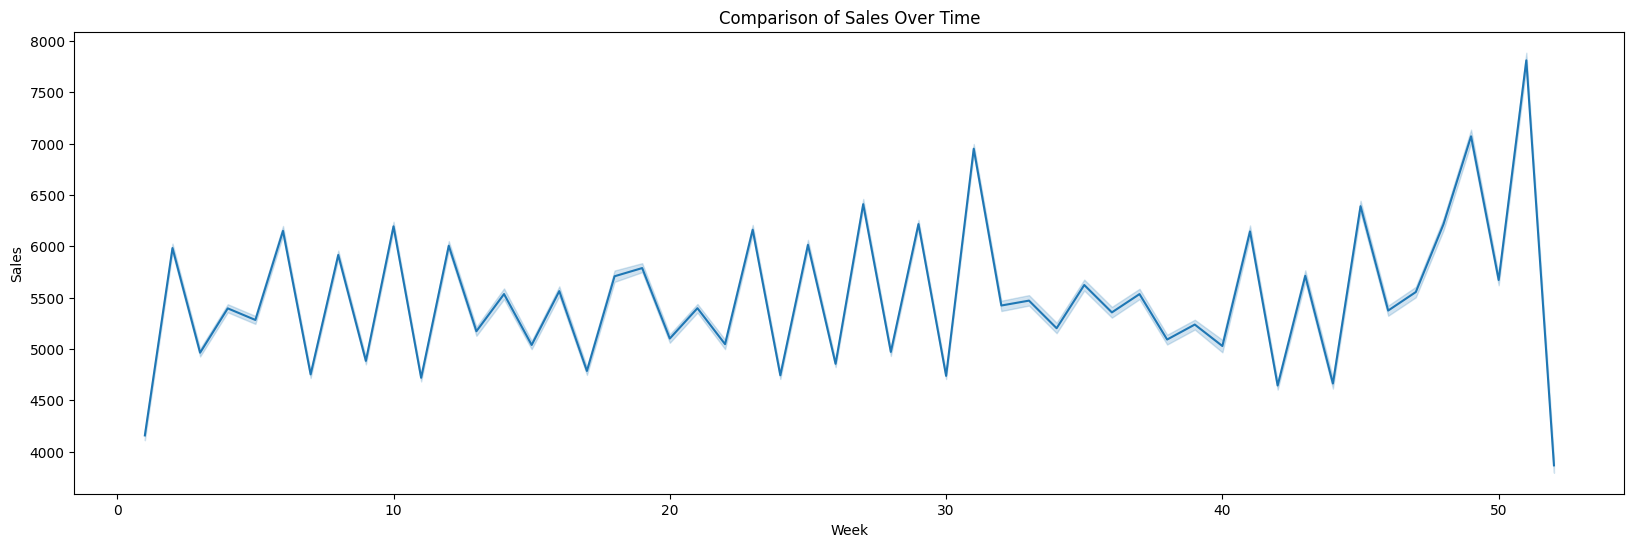

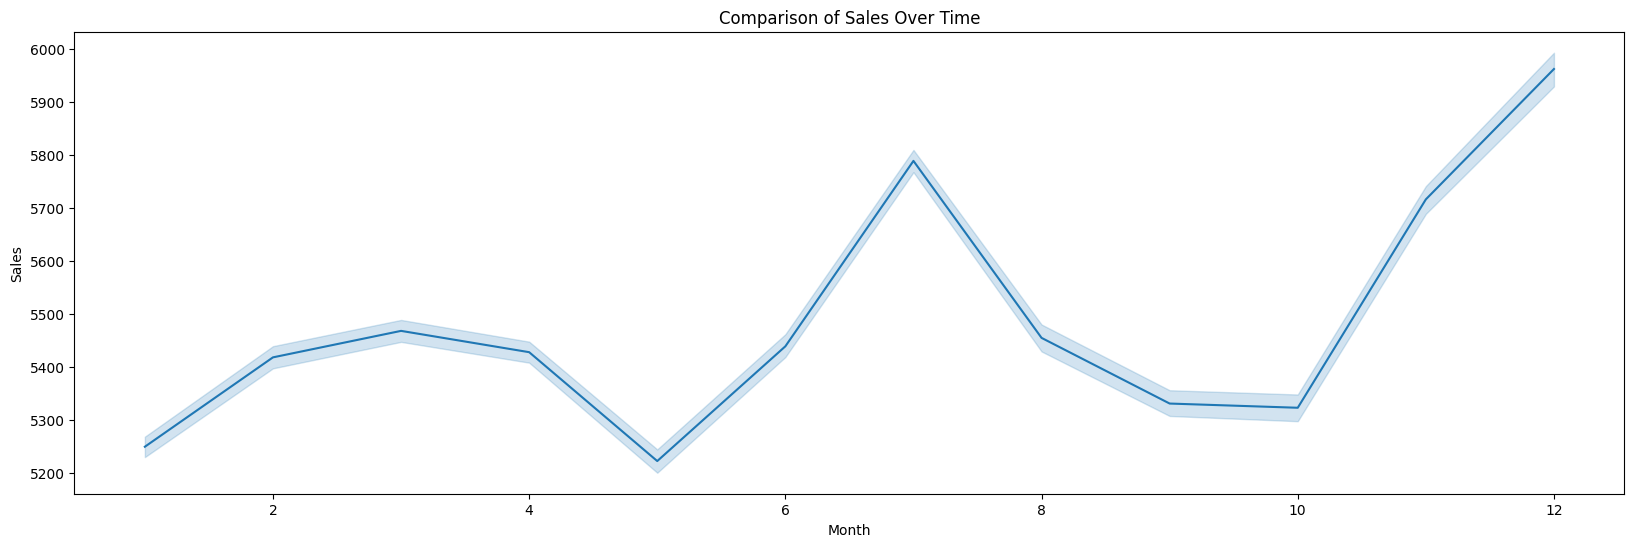

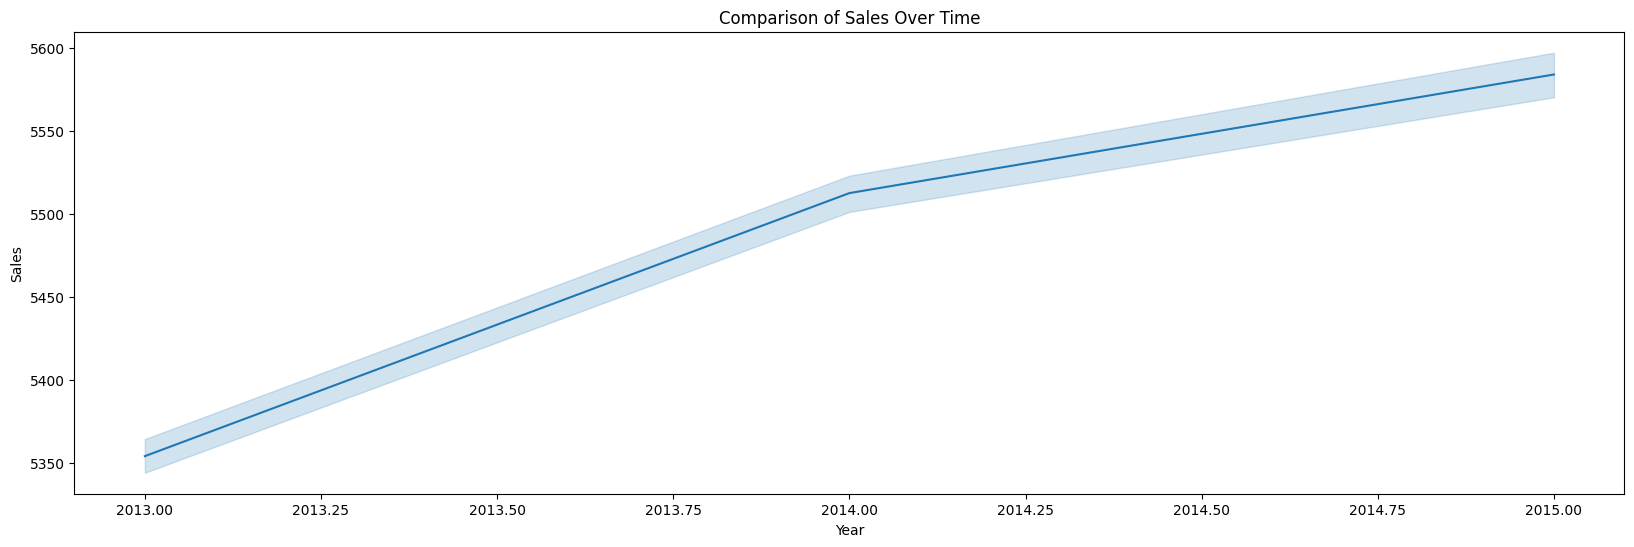

In [19]:
# Plotting violin plots for selected features
for feature in selected_features:
    visualizer.plot_line(train_df, feature, 'Sales')

The line plot provides a visual representation of sales trends over different time periods.

- The first plot shows sales trends over each day. The sales are high on the first and last days of the month. However, between day 1 and day 30, the sales are inconsistent, with periods of increase and decrease.
- The second plot shows sales trends over each week. The sales trends over each week appear to be stationary, meaning that the average sales do not seem to change significantly over time.
- The third plot shows sales trends over each month. The sales are higher in the 7th and 12th months, while there is a smaller sales during the 5th and 10th months.
- The fourth plot shows sales trends over each year. The sales increase year by year, indicating a positive trend over time.
Overall, the line plot provides valuable insights into sales trends over different time periods, allowing us to identify patterns and make informed decisions.

Q13. Sales and StorType distrbustions among each Seasons. 

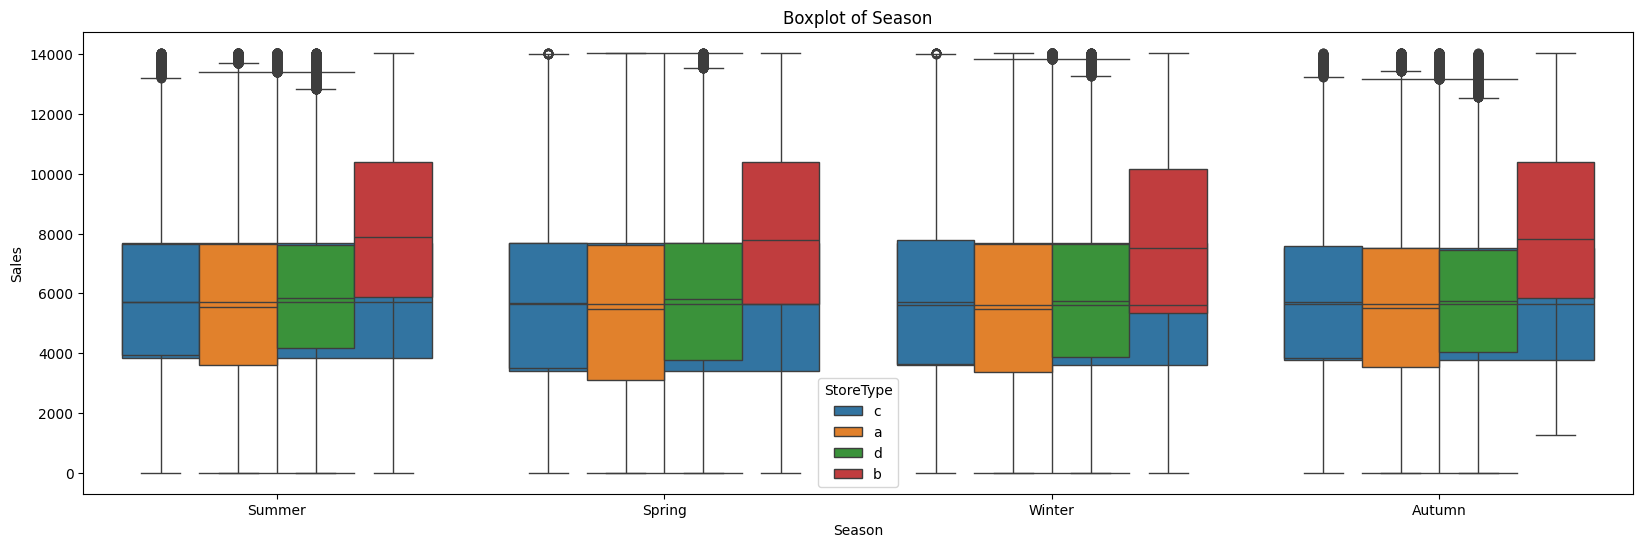

In [28]:
visualizer.plot_boxplot(train_df, "Season", "Sales", "StoreType")

The box plot shows, The sales and stortype seems the same throughout each seasons.

# Conclusions
In conclusion, this exploratory data analysis has provided valuable insights into tthe Rossmann Store Sales dataset. Through various visualizations and statistical analyses, I have identified key trends and patterns that offer a deeper understanding of the data, the following conclusions can be drawn:

- Promotions have a significant impact on sales and customer behavior. Stores with promotions had higher sales and more customers compared to stores without promotions.
- Stores that are open on all weekdays tend to have higher sales on weekends compared to stores that are closed on weekends.
- The opening or reopening of new competitors near a store can have a negative impact on sales and customer behavior. Stores that had NA as competitor distance but later on had values for competitor distance showed a decrease in sales and customers after the opening or reopening of new competitors.
- Sales trends vary over different time periods. Sales are high on the first and last days of the month, but there is inconsistency between day 1 and day 30. Sales trends over each week appear to be stationary, while sales trends over each month show higher sales in the 7th and 12th months and lower sales in the 5th and 10th months. Sales trends over each year show a positive trend, with sales increasing year by year.
- Seasonal holidays, such as Easter and Christmas, have a significant impact on sales. Stores with seasonal holidays had higher sales compared to stores without seasonal holidays.
- Stores with assortment levels of 'extra' and 'extended' had higher sales and more customers compared to stores with an assortment level of 'basic'.
- Stores with a store type of 'b' had higher sales and more customers compared to stores with other store types.

These conclusions can be used to inform business decisions and strategies, such as optimizing promotional activities, targeting stores for competitor analysis, and adjusting assortment levels and store types to improve sales and customer satisfaction.

# Limitations:

Limitations of the EDA:
- The dataset does not include data on other factors that could affect sales, such as weather conditions, economic indicators, or demographic information.
- The dataset does not include data on the quality or price of products sold in each store, which could affect sales and customer behavior.
- The dataset does not include data on the marketing or advertising efforts of each store, which could also affect sales and customer behavior.
- The dataset does not include data on the satisfaction or loyalty of customers, which could be an important factor in determining sales trends.

These limitations should be considered when interpreting the results of the analysis and when making decisions based on the findings. Further analysis could benefit from including data from all relevant sources for a more comprehensive exploration.

# Reference
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

[Matplotlib Documentation](https://matplotlib.org/stable/tutorials/index.html)

[Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)

[Exploratory Data Analysis](https://www.epa.gov/caddis/exploratory-data-analysis)